In [270]:
#Data analysis and data cleaning

import pandas as pd
import numpy as np
import random as rnd

def titanic(train,test):
    train_df = pd.read_csv(train)
    test_df = pd.read_csv(test)
    combine = [train_df,test_df]
    
    train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
    test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
    combine = [train_df, test_df]

    for dataset in combine:
        dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

    pd.crosstab(train_df['Title'], train_df['Sex'])

    for dataset in combine:
        dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

        dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    for dataset in combine:
        dataset['Title'] = dataset['Title'].map(title_mapping)
        dataset['Title'] = dataset['Title'].fillna(0)

    train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
    test_df = test_df.drop(['Name'], axis=1)
    combine = [train_df, test_df]

    for dataset in combine:
        dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

    guess_ages = np.zeros((2,3))
    guess_ages

    for dataset in combine:
        for i in range(0, 2):
            for j in range(0, 3):
                guess_df = dataset[(dataset['Sex'] == i) & \
                                      (dataset['Pclass'] == j+1)]['Age'].dropna()

                # age_mean = guess_df.mean()
                # age_std = guess_df.std()
                # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

                age_guess = guess_df.median()

                # Convert random age float to nearest .5 age
                guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

        for i in range(0, 2):
            for j in range(0, 3):
                dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                        'Age'] = guess_ages[i,j]

        dataset['Age'] = dataset['Age'].astype(int)

    for dataset in combine:
        dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1



    for dataset in combine:
        dataset['IsAlone'] = 0
        dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

    combine = [train_df, test_df]

    freq_port = train_df.Embarked.dropna().mode()[0]

    for dataset in combine:
        dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

    test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

    test_df.head(10)
    return train_df, test_df

In [271]:
new_train ,new_test =  titanic('train.csv', 'test.csv')

In [272]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
Title         891 non-null int64
FamilySize    891 non-null int64
IsAlone       891 non-null int64
dtypes: float64(1), int64(9), object(1)
memory usage: 76.6+ KB


In [273]:
new_train = pd.get_dummies(new_train)

In [274]:
new_test = pd.get_dummies(new_test)

In [275]:
# new_train.head(10)
new_test.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34,0,0,7.8292,1,1,1,0,1,0
1,893,3,1,47,1,0,7.0000,3,2,0,0,0,1
2,894,2,0,62,0,0,9.6875,1,1,1,0,1,0
3,895,3,0,27,0,0,8.6625,1,1,1,0,0,1
4,896,3,1,22,1,1,12.2875,3,3,0,0,0,1
5,897,3,0,14,0,0,9.2250,1,1,1,0,0,1
6,898,3,1,30,0,0,7.6292,2,1,1,0,1,0
7,899,2,0,26,1,1,29.0000,1,3,0,0,0,1
8,900,3,1,18,0,0,7.2292,3,1,1,1,0,0
9,901,3,0,21,2,0,24.1500,1,3,0,0,0,1


In [276]:
new_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22,1,0,7.2500,1,2,0,0,0,1
1,1,1,1,38,1,0,71.2833,3,2,0,1,0,0
2,1,3,1,26,0,0,7.9250,2,1,1,0,0,1
3,1,1,1,35,1,0,53.1000,3,2,0,0,0,1
4,0,3,0,35,0,0,8.0500,1,1,1,0,0,1
5,0,3,0,25,0,0,8.4583,1,1,1,0,1,0
6,0,1,0,54,0,0,51.8625,1,1,1,0,0,1
7,0,3,0,2,3,1,21.0750,4,5,0,0,0,1
8,1,3,1,27,0,2,11.1333,3,3,0,0,0,1
9,1,2,1,14,1,0,30.0708,3,2,0,1,0,0


In [277]:
x_train = new_train.iloc[:,1:]
y_train = new_train.iloc[:,0]
x_test = new_test.iloc[:,1:]
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34,0,0,7.8292,1,1,1,0,1,0
1,3,1,47,1,0,7.0000,3,2,0,0,0,1
2,2,0,62,0,0,9.6875,1,1,1,0,1,0
3,3,0,27,0,0,8.6625,1,1,1,0,0,1
4,3,1,22,1,1,12.2875,3,3,0,0,0,1
5,3,0,14,0,0,9.2250,1,1,1,0,0,1
6,3,1,30,0,0,7.6292,2,1,1,0,1,0
7,2,0,26,1,1,29.0000,1,3,0,0,0,1
8,3,1,18,0,0,7.2292,3,1,1,1,0,0
9,3,0,21,2,0,24.1500,1,3,0,0,0,1


In [278]:
from sklearn import tree


In [279]:
clf = tree.DecisionTreeClassifier(max_depth = 4)

In [280]:
clf = clf.fit(x_train,y_train)

In [281]:
#Decision Tree

# from sklearn.datasets import load_iris
# from sklearn.metrics import classification_report
# from sklearn import tree
# import numpy as np

# sizevar = 120
# clf = tree.DecisionTreeClassifier(random_state=100)
# clf = clf.fit(iris.data[:sizevar,:], iris.target[:sizevar])

In [282]:
y_predict = clf.predict(x_test)

In [283]:
type(y_predict)

numpy.ndarray

In [284]:
#  df = pd.DataFrame([new_test['PassengerId'],y_predict],columns = ['PassengerId', 'Survival'])
df = pd.DataFrame(np.array([new_test.iloc[:,0],y_predict]).T,columns=['PassengerId','Survived'])
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [285]:
# x = np.array([new_test.iloc[:,0],y_predict]).T
# x

In [286]:
df.to_csv('predictions.csv',index=False)

In [287]:
feature_names = x_train.columns
# target_names = y_train.columns
y_train = pd.DataFrame(y_train)
target_names = y_train.columns[0]
target_names

'Survived'

In [288]:
from IPython.display import Image 
from StringIO import StringIO
import pydotplus
dot_data = StringIO()
def visualize_tree(clf,feature_name,target_name):
      
    tree.export_graphviz(clf, out_file=dot_data, feature_names=feature_names, 
                         class_names=target_names, filled=True, rounded=True, special_characters=True)  

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

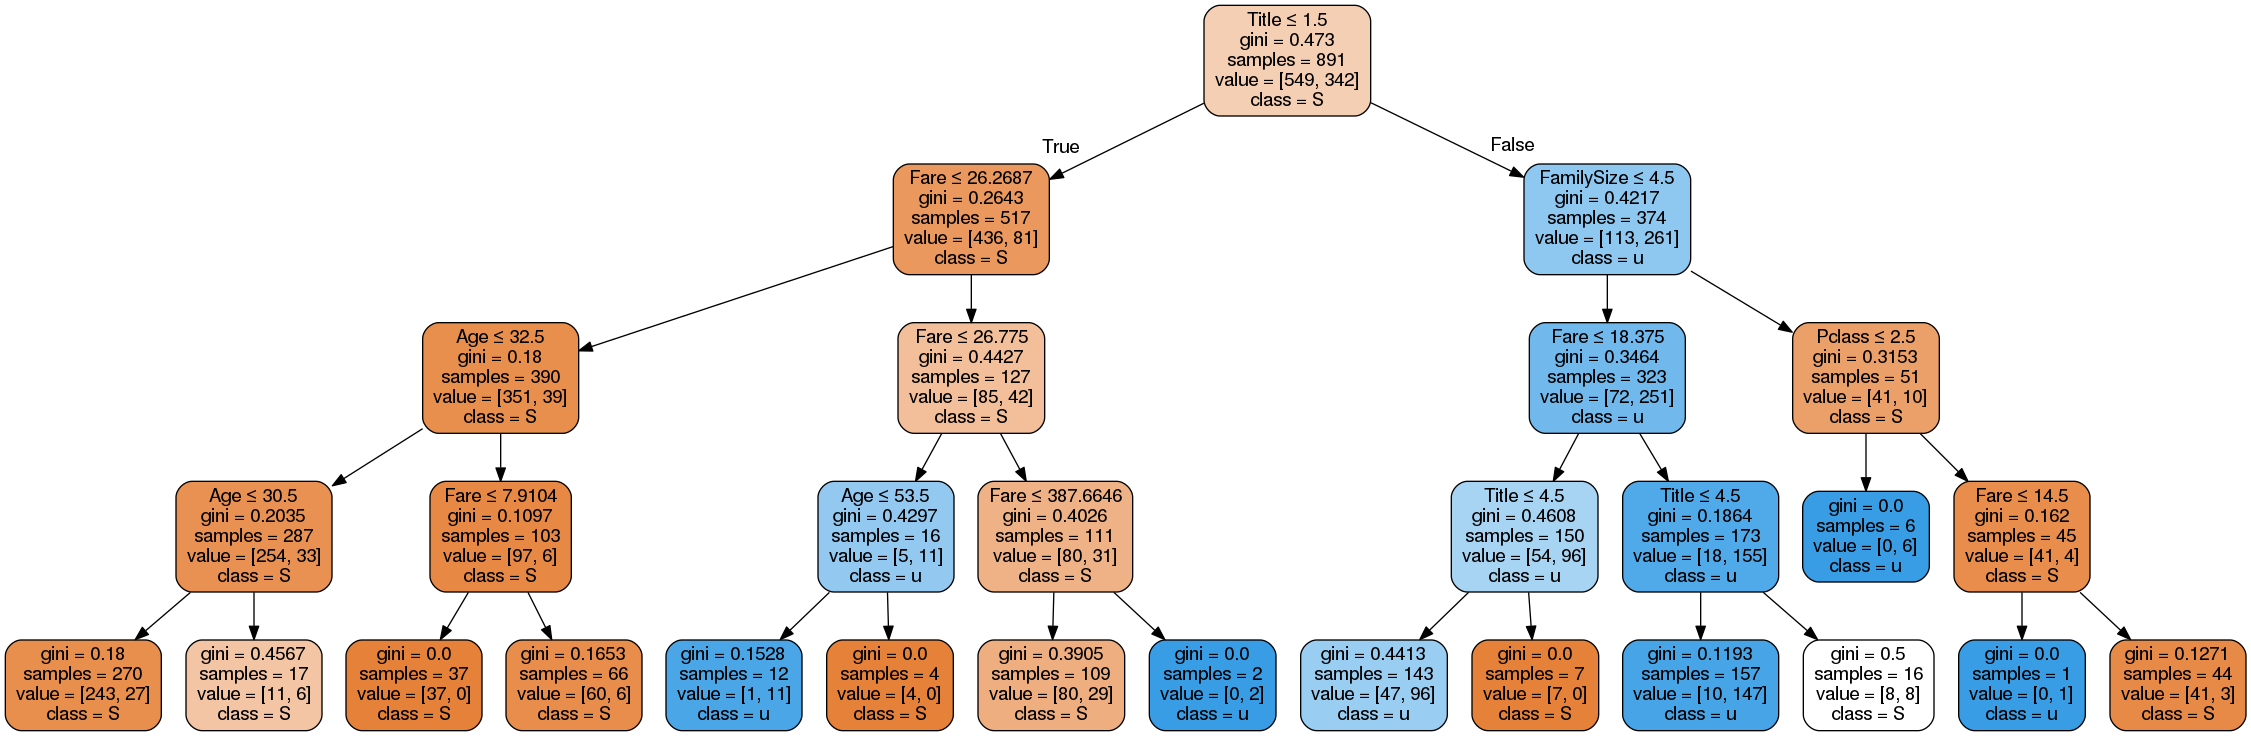

In [289]:
visualize_tree(clf, feature_names, target_names)